In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
# from tensorflow.keras import layers
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [2]:
#digit MNist dataset import
(X_train_digit, y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [3]:
X_train_digit.shape

(60000, 28, 28)

In [4]:
X_test_digit.shape

(10000, 28, 28)

In [5]:
X_train_digit=X_train_digit.reshape(X_train_digit.shape[0],28,28,1)
X_test_digit=X_test_digit.reshape(X_test_digit.shape[0],28,28,1)

In [6]:
X_train_digit=X_train_digit.astype('float32')
X_test_digit=X_test_digit.astype('float32')

In [7]:
X_train_digit/=255
X_test_digit/=255

In [8]:
#Creating base neural network
input_shape = (28, 28, 1)
model= Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


C:\Users\Windows\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(x=X_train_digit,y=y_train_digit,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.9349 - loss: 0.2168
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9734 - loss: 0.0872
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9810 - loss: 0.0608
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9859 - loss: 0.0453
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9879 - loss: 0.0363
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9901 - loss: 0.0294
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9909 - loss: 0.0254
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9927 - loss: 0.0214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9937 - loss: 0.0183
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9937 - loss: 0.0182


In [11]:
model.evaluate(X_test_digit,y_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9852 - loss: 0.0634


[0.06335979700088501, 0.9851999878883362]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


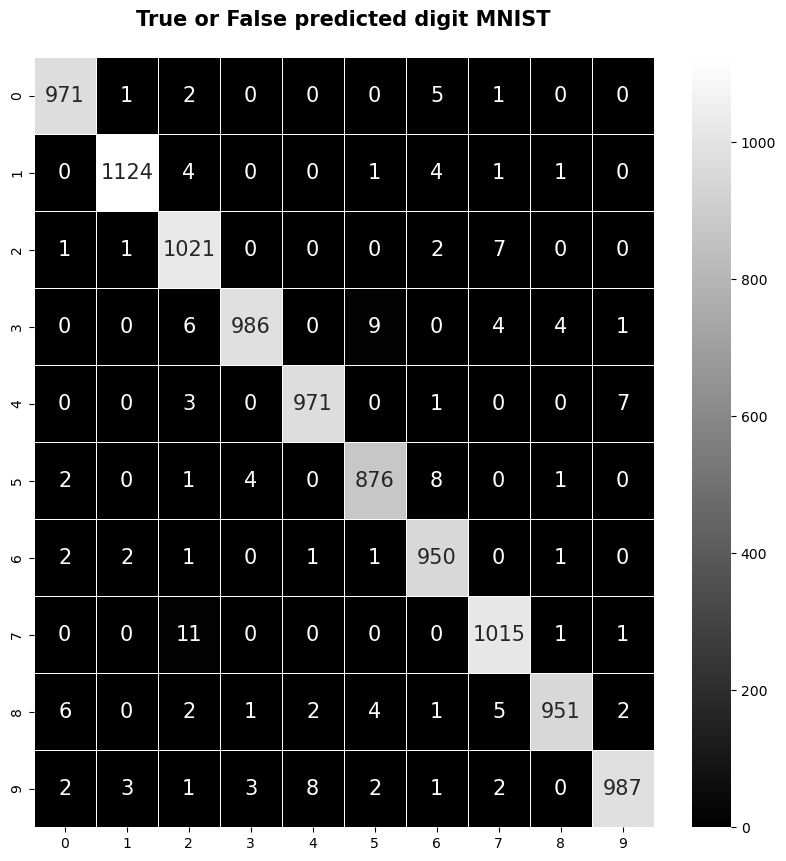

In [13]:
#1. Check if labels are one-hot or integers
if len(y_test_digit.shape) > 1:
    # If it's a grid (One-Hot), we need argmax
    y_test_digit_eval = np.argmax(y_test_digit, axis=1)
else:
    # If it's just a list (Integers), use it as is!
    y_test_digit_eval = y_test_digit

# 2. Process your predictions (these are almost always 2D probabilities)
y_predict_test = model.predict(X_test_digit)
y_predicts_test = np.argmax(y_predict_test, axis=1)

# 3. Now the confusion matrix will work perfectly
con_mat = confusion_matrix(y_test_digit_eval, y_predicts_test)

# Plot
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
6


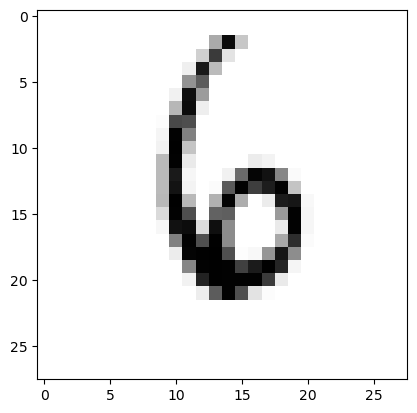

In [16]:
image_index = 6900
plt.imshow(X_test_digit[image_index].reshape(28, 28),cmap='Greys')
predict = X_test_digit[image_index].reshape(28,28)
pred = model.predict(X_test_digit[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

